In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons


In [3]:
from sklearn.cluster import DBSCAN

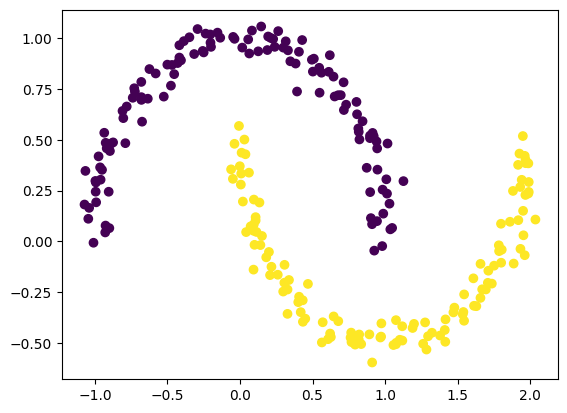

In [5]:
X,Y=make_moons(n_samples=250,noise=0.05)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [6]:
#feature scaling
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


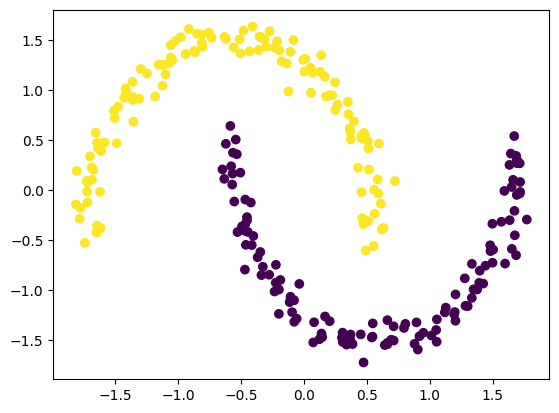

In [7]:
dbcan=DBSCAN(eps=0.3)
dbcan.fit(X_scaled)

plt.scatter(X_scaled[:,0],X_scaled[:,1],c=dbcan.labels_)